### Name: Shiven Tripathi
### Roll No.: 190816

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer
import qiskit
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

(15) Implement Deutsch-Jozsa Algorithm for $f:\{0,1\}^3 \rightarrow \{0,1\}$ where $f(x)=1$ for all $x$ and the starting state is $|0 \rangle |0 \rangle$. Show the circuit and state vector.

* Constant oracle created by realising q3 XOR 1 = NOT q3

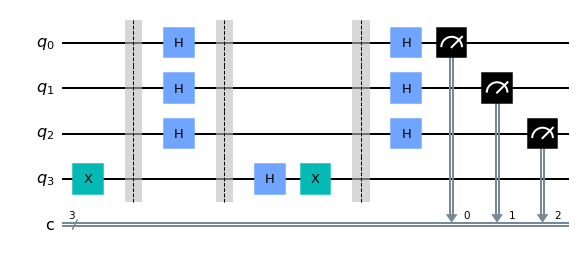

In [2]:
circ = QuantumCircuit(4,3)

circ.x(3)
circ.barrier()
circ.h([0,1,2])

circ.barrier()
circ.h(3)
circ.x(3)
circ.barrier()

circ.h([0,1,2])
circ.measure([0,1,2],[0,1,2])

circ.draw(output='mpl')

In [3]:
simulator = Aer.get_backend('aer_simulator')
circ.save_statevector()
qobj = assemble(circ)
result = simulator.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

* Result for constant function which generates output as 1 always:
* Only non zero probability seen for the |000> state after measurement

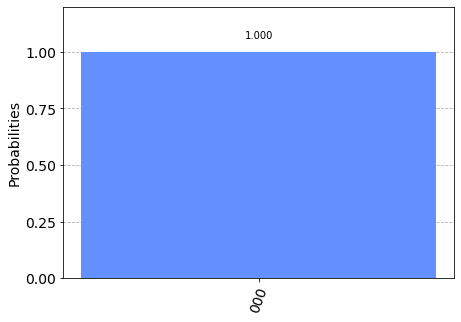

In [4]:
plot_histogram(result.get_counts())

(15) Implement Deutsch-Jozsa Algorithm for any balanced function $f:\{0,1\}^3 \rightarrow \{0,1\}$ (starting state is $|0 \rangle |0 \rangle$). Show the circuit and state vector.


* Balanced function oracle created by applying CNOT to output register, controlled on each input register qubit

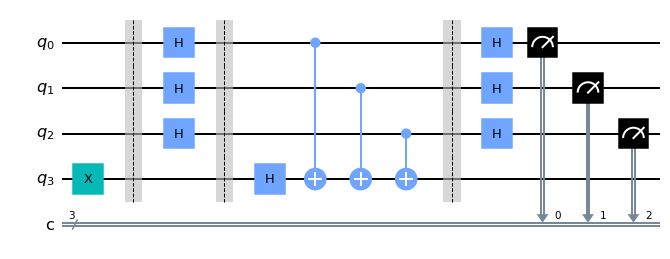

In [5]:
circ = QuantumCircuit(4,3)

circ.x(3)
circ.barrier()
circ.h([0,1,2])

circ.barrier()
circ.h(3)
circ.cx(0,3)
circ.cx(1,3)
circ.cx(2,3)
circ.barrier()

circ.h([0,1,2])
circ.measure([0,1,2],[0,1,2])

circ.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('aer_simulator')
circ.save_statevector()
qobj = assemble(circ)
result = simulator.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

* Result for arbitrary balanced function:
* Only non zero probability seen for the |111> state after measurement

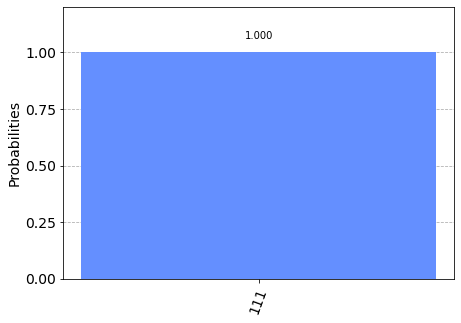

In [7]:
plot_histogram(result.get_counts())

(20) Built QFT circuit for 3 qubits. Make sure to put the Swap gate in the end so that the final qubits are in the right allignment. Show the circuit and action of circuit as matrix.

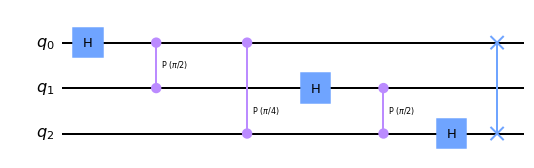

In [25]:
circ = QuantumCircuit(3)

circ.h(0)
circ.cp(np.pi/2, 0, 1)
circ.cp(np.pi/4, 0, 2)
circ.h(1)
circ.cp(np.pi/2, 1, 2)
circ.h(2)

circ.swap(0, 2)

circ.draw('mpl')

### Action Matrix of QFT

(8, 8)
[[ 0.354+0.j     0.354+0.j     0.354+0.j     0.354+0.j     0.354+0.j
   0.354+0.j     0.354+0.j     0.354+0.j   ]
 [ 0.354+0.j     0.354+0.j     0.354+0.j     0.354+0.j    -0.354+0.j
  -0.354+0.j    -0.354+0.j    -0.354+0.j   ]
 [ 0.354+0.j     0.354+0.j    -0.354+0.j    -0.354+0.j     0.   +0.354j
   0.   +0.354j -0.   -0.354j -0.   -0.354j]
 [ 0.354+0.j     0.354+0.j    -0.354+0.j    -0.354+0.j    -0.   -0.354j
  -0.   -0.354j  0.   +0.354j  0.   +0.354j]
 [ 0.354+0.j    -0.354+0.j     0.   +0.354j -0.   -0.354j  0.25 +0.25j
  -0.25 -0.25j  -0.25 +0.25j   0.25 -0.25j ]
 [ 0.354+0.j    -0.354+0.j     0.   +0.354j -0.   -0.354j -0.25 -0.25j
   0.25 +0.25j   0.25 -0.25j  -0.25 +0.25j ]
 [ 0.354+0.j    -0.354+0.j    -0.   -0.354j  0.   +0.354j -0.25 +0.25j
   0.25 -0.25j   0.25 +0.25j  -0.25 -0.25j ]
 [ 0.354+0.j    -0.354+0.j    -0.   -0.354j  0.   +0.354j  0.25 -0.25j
  -0.25 +0.25j  -0.25 -0.25j   0.25 +0.25j ]]


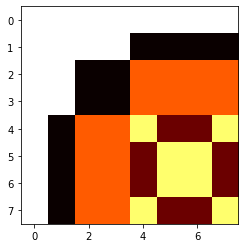

In [26]:
actionMatrix = qiskit.quantum_info.Operator(circ).data
print(actionMatrix.shape)
print(actionMatrix.round(3))
import matplotlib.pyplot as plt
plt.imshow(np.real(actionMatrix), cmap='hot', interpolation='nearest')
plt.show()

In [10]:
import pandas as pd

print(pd.DataFrame(actionMatrix.round(2)))

            0           1           2           3           4           5  \
0  0.35+0.00j  0.35+0.00j  0.35+0.00j  0.35+0.00j  0.35+0.00j  0.35+0.00j   
1  0.35+0.00j  0.35+0.00j  0.35+0.00j  0.35+0.00j -0.35+0.00j -0.35+0.00j   
2  0.35+0.00j  0.35+0.00j -0.35+0.00j -0.35+0.00j  0.00+0.35j  0.00+0.35j   
3  0.35+0.00j  0.35+0.00j -0.35+0.00j -0.35+0.00j -0.00-0.35j -0.00-0.35j   
4  0.35+0.00j -0.35+0.00j  0.00+0.35j -0.00-0.35j  0.25+0.25j -0.25-0.25j   
5  0.35+0.00j -0.35+0.00j  0.00+0.35j -0.00-0.35j -0.25-0.25j  0.25+0.25j   
6  0.35+0.00j -0.35+0.00j -0.00-0.35j  0.00+0.35j -0.25+0.25j  0.25-0.25j   
7  0.35+0.00j -0.35+0.00j -0.00-0.35j  0.00+0.35j  0.25-0.25j -0.25+0.25j   

            6           7  
0  0.35+0.00j  0.35+0.00j  
1 -0.35+0.00j -0.35+0.00j  
2 -0.00-0.35j -0.00-0.35j  
3  0.00+0.35j  0.00+0.35j  
4 -0.25+0.25j  0.25-0.25j  
5  0.25-0.25j -0.25+0.25j  
6  0.25+0.25j -0.25-0.25j  
7 -0.25-0.25j  0.25+0.25j  


* Running the circuit for state |011> = |q2q1q0> 
* NOT gates have been used for q1, q0 to get qubit in state |1>, they are not a part of the QFT circuit
* Bloch sphere is shown to demonstrate action on qubits after QFT

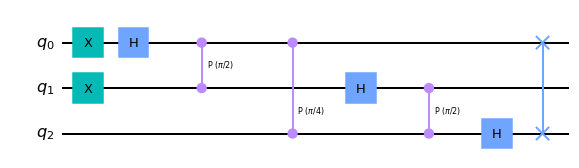

In [21]:
circ = QuantumCircuit(3)

circ.x(0)
circ.x(1)
# circ.x(2)

circ.h(0)
circ.cp(np.pi/2, 0, 1)
circ.cp(np.pi/4, 0, 2)
circ.h(1)
circ.cp(np.pi/2, 1, 2)
circ.h(2)

circ.swap(0, 2)

circ.draw('mpl')

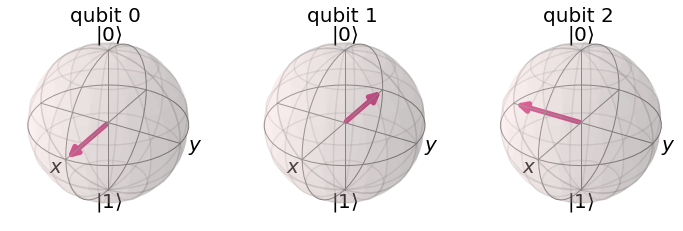

In [22]:
sim = Aer.get_backend("aer_simulator")
circ.save_statevector()
statevector = sim.run(circ).result().get_statevector()
plot_bloch_multivector(statevector)

In [23]:
array_to_latex(statevector, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

# References:
* For action matrix: https://quantumcomputing.stackexchange.com/questions/14280/how-can-i-obtain-transformation-matrix-of-a-quantum-circuit-in-the-qiskit
* In general qiskit.org documentation was referred to for understanding the different functions and their usage
* Demo code (from this notebook) has been directly copied in some cells